<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li><a href="#Introduction" data-toc-modified-id="Introduction-1.0"><span class="toc-item-num">1.0&nbsp;&nbsp;</span>Introduction</a>
            <ul class="toc-item">
                <li><a href="#Data-Acquisition" data-toc-modified-id="Data-Acquisition-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Acquisition</a></li>
                <li><a href="#Data-Inspection" data-toc-modified-id="Data-Inspection-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Inspection</a></li>
                <li><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data Cleaning</a></li>
                <li><a href="#Descriptive-Statistics" data-toc-modified-id="Descriptive-Statistics-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Descriptive Statistics</a></li>
            </ul>
        </li>
        <li><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-2.0"><span class="toc-item-num">2.0&nbsp;&nbsp;</span>Data Analysis</a>
            <li><a href="#Evaluating-each-of-the-proposed-hypotheses-through-testing." data-toc-modified-id="Evaluating-each-of-the-proposed-hypotheses-through-testing."><span class="toc-item-num">&nbsp;&nbsp;</span>Evaluating each of the proposed hypotheses through testing.</a>
            <ul class="toc-item">
                <li><a href="#Temporal-Patterns:-(year,-month,-day)" data-toc-modified-id="Temporal-Patterns: (year,-month, day)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Temporal-Patterns: (year, month, day)</a>
                    <ul class="toc-item">
                        <li><a href="#Year" data-toc-modified-id="Year-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Year</a></li>
                        <li><a href="#Month" data-toc-modified-id="Month-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Month</a></li>
                        <li><a href="#Days-of-weeks" data-toc-modified-id="Days-of-weeks-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Days of weeks</a></li>
                    </ul>
                </li>
                <li><a href="#Geospatial-Distribution:-(location-or-area(latitude-and-longitude))" data-toc-modified-id="Geospatial-Distribution:-(location-or-area(latitude-and-longitude))-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Geospatial Distribution: (location or area(latitude and longitude))</a>
                    <ul class="toc-item">
                        <li><a href="#Location" data-toc-modified-id="Location-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Location</a></li>
                    </ul>
                </li>
                <li><a href="#Demographic-Influences:-(age,-sex-(gender),-types-of-crimes,-types-of-weapons)" data-toc-modified-id="Demographic-Influences:-(age,-sex-(gender),-types-of-crimes,-types-of-weapons)"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Demographic Influences: (age, sex (gender), types of crimes, types of weapons)</a>
                    <ul class="toc-item">
                        <li><a href="#Age" data-toc-modified-id="Age-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Age</a></li>
                        <li><a href="#Gender" data-toc-modified-id="Gender-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Gender</a></li>
                        <li><a href="#Crime-types" data-toc-modified-id="Crime-types-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Crime types</a></li>
                        <li><a href="#Types-of-weapons" data-toc-modified-id="Types-of-weapons-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Types of weapons</a></li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><a href="#Conclusion" data-toc-modified-id="Conclusion-3.0"><span class="toc-item-num">3.0&nbsp;&nbsp;</span>Conclusion</a></li>
    </ul>
</div>


# Los Angeles Crime Trends (2020–Present): A Python-Powered Public Safety Analysis

Crime Data from 2020 to Present

## Introduction

### Data Acquisition

Metadata Updated: November 24, 2023
taken from the website:(https://catalog.data.gov/dataset/crime-data-from-2020-to-present)

In this study, I conducted a comprehensive analysis of a dataset detailing criminal incidents in the city of Los Angeles from 2020 to the present. The data is based on original crime reports recorded on paper, and due to the nature of its collection, it may contain some inaccuracies.

**Analysis Objective:**
The primary purpose of this analysis is to understand trends and patterns in crime incidence and examine key factors that may influence public safety. The goal is to identify potential problem areas and determine whether discernible patterns exist in terms of crime types, locations, and temporal periods.

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Basic libraries to manipulate data
import matplotlib.pyplot as plt  
import numpy as np  
import pandas as pd 
import plotly.express as px
import seaborn as sns
from scipy import stats

from matplotlib.ticker import FuncFormatter
import calendar

In [3]:
# To ensure all the probabilistic things are reproducible
np.random.seed(42)

In [4]:
# Specify the path to the datasets
data_path = "./data/"

# Specify the filenames of the datasets
crime_filename = "Crime_Data_from_2020_to_Present.csv"

# Read the CSV files and create backup copies
crime_df_data = pd.read_csv(data_path + crime_filename)

# Create working copies of the dataframes for analysis
crime_df = crime_df_data.copy()

### Data Inspection

In [5]:
# Let's show the first rows of a DataFrame
crime_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [6]:
# Let's check its structure
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843514 entries, 0 to 843513
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           843514 non-null  int64  
 1   Date Rptd       843514 non-null  object 
 2   DATE OCC        843514 non-null  object 
 3   TIME OCC        843514 non-null  int64  
 4   AREA            843514 non-null  int64  
 5   AREA NAME       843514 non-null  object 
 6   Rpt Dist No     843514 non-null  int64  
 7   Part 1-2        843514 non-null  int64  
 8   Crm Cd          843514 non-null  int64  
 9   Crm Cd Desc     843514 non-null  object 
 10  Mocodes         726560 non-null  object 
 11  Vict Age        843514 non-null  int64  
 12  Vict Sex        732198 non-null  object 
 13  Vict Descent    732190 non-null  object 
 14  Premis Cd       843504 non-null  float64
 15  Premis Desc     843004 non-null  object 
 16  Weapon Used Cd  293900 non-null  float64
 17  Weapon Des

In [7]:
# Total number of rows in the DataFrame,length or number of observations in a DataFrame in pandas 
crime_df.shape[0]

843514

In [8]:
# Indexing the Columns
crime_df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

### Data Cleaning

Identify and handle missing data appropriately

In [9]:
# To see null values
crime_df.isna()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843509,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,True,False,False
843510,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,True,False,False
843511,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,True,False,False
843512,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,True,False,False


Note: False gets interpreted as a 0 and True as a 1

In [10]:
# How many null values we have per column
crime_df.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           116954
Vict Age               0
Vict Sex          111316
Vict Descent      111324
Premis Cd             10
Premis Desc          510
Weapon Used Cd    549614
Weapon Desc       549614
Status                 0
Status Desc            0
Crm Cd 1              11
Crm Cd 2          781593
Crm Cd 3          841421
Crm Cd 4          843453
LOCATION               0
Cross Street      709048
LAT                    0
LON                    0
dtype: int64

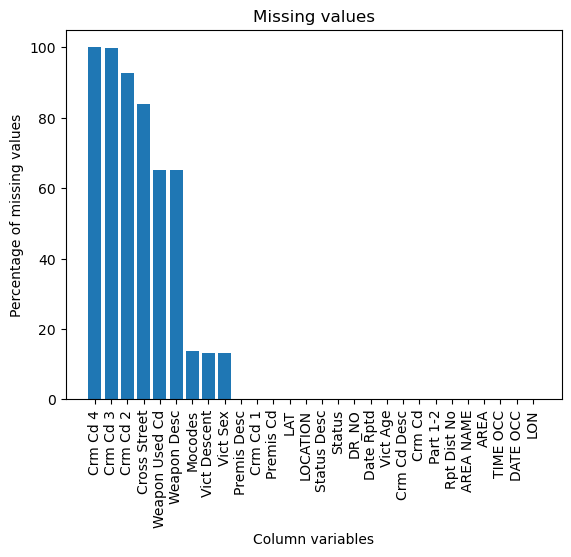

In [11]:
# Graph of number of null values
def visualize_null(dataframe, percentage=True):
    # Calculates the number of null values per column and sorts them in descending order
    null_series = dataframe.isna().sum().sort_values(ascending=False)

    # If the percentage parameter is True, converts the number of nulls to a percentage
    if percentage:
        null_series = null_series / len(dataframe) * 100

    # Create a bar chart with the columns on the x-axis and the number or percentage of nulls on the y-axis
    plt.bar(x=null_series.index, height=null_series.values)

    # Set the y-axis label based on whether it is percentage or quantity
    if percentage:
        plt.ylabel('Percentage of missing values')
    else:
        plt.ylabel('Amount of missing values')

    # Set the title and labels of the axis
    plt.title('Missing values')
    plt.xlabel('Column variables')
    plt.xticks(rotation=90) 

    # Show the graph
    plt.show()

# Call the function with a specific DataFrame
visualize_null(crime_df)


I analyzed the importance of all missing values in each column in order to understand the significance.

In [12]:
A=((crime_df['Mocodes'].isnull().sum())/ crime_df.shape[0])*100
B=((crime_df['Vict Sex'].isnull().sum())/ crime_df.shape[0])*100
C=((crime_df['Vict Descent'].isnull().sum())/ crime_df.shape[0])*100
D=((crime_df['Premis Cd'].isnull().sum())/ crime_df.shape[0])*100
E=((crime_df['Premis Desc'].isnull().sum())/ crime_df.shape[0])*100
F=((crime_df['Weapon Used Cd'].isnull().sum())/ crime_df.shape[0])*100
G=((crime_df['Crm Cd 1'].isnull().sum())/ crime_df.shape[0])*100
H=((crime_df['Cross Street'].isnull().sum())/ crime_df.shape[0])*100

print(f'Importance Mocodes:{A:.2f}%')
print(f'Importance Vict Sex:{B:.2f}%')
print(f'Importance Vict Descent:{C:.2f}%')
print(f'Importance Premis Cd:{D:.2f}%')
print(f'Importance Premis Desc:{E:.2f}%')
print(f'Importance Weapon Used Cd:{F:.2f}%')
print(f'Importance Crm Cd 1:{G:.2f}%')
print(f'Importance Cross Street:{H:.2f}%')

Importance Mocodes:13.87%
Importance Vict Sex:13.20%
Importance Vict Descent:13.20%
Importance Premis Cd:0.00%
Importance Premis Desc:0.06%
Importance Weapon Used Cd:65.16%
Importance Crm Cd 1:0.00%
Importance Cross Street:84.06%


An analysis of the percentage of missing values reveals that the "Weapon Used Cd" and "Cross Street" fields are particularly critical, as they contain significant amounts of missing data. The absence of information in these features is likely to affect both interpretation and the ability to predict patterns in criminal incidents.

Additionally, fields such as "Mocodes," "Vict Sex," and "Vict Descent" show missing value percentages around 13%. While not as pivotal as "Weapon Used Cd" and "Cross Street," they still have the potential to offer valuable insights into crime dynamics.

In contrast, "Premis Cd" and "Crm Cd 1" exhibit 0.00% missing data, indicating that they are complete according to this analysis. As such, these features may be considered for removal if the goal is to streamline the dataset and improve the efficiency of further analysis.

In [13]:
# List of columns with 0% importance
columns_to_remove = ['Premis Cd', 'Crm Cd 1']

# Drop the columns
crime_df = crime_df.drop(columns=columns_to_remove, axis=1)

Upon scrutinizing the variables and exploring potential data interpretations, various hypotheses are presented below that could be investigated using this dataset.

### Hypothesis:

Temporal patterns, geospatial distribution, and demographic influences collectively shape crime dynamics in Los Angeles.

**1) Temporal Patterns:**

*Hypothesis:* Crime rates in Los Angeles exhibit temporal patterns, experiencing increases during specific months or moments of the day.

*Explanation:* Seasonal variations, holidays, or changes in daylight hours may significantly influence criminal activity, leading to fluctuations in crime rates.

**2) Geospatial Distribution:**

*Hypothesis:* Crime is not uniformly distributed in Los Angeles; specific neighborhoods or districts encounter higher crime rates.

*Explanation:* Socioeconomic factors, population density, and local infrastructure contribute to spatial variations in crime, creating areas with distinct crime levels.

**3) Demographic Influences:**

*Hypothesis:* Certain demographic factors, such as age or gender, correlate with specific types of crimes in Los Angeles.

*Explanation:* Different age groups or gender demographics may exhibit varying susceptibilities to distinct criminal activities, influencing the overall crime landscape.

With these hypotheses formulated and their subdivisions, certain variables and columns have become unnecessary. In this particular case, I will proceed by eliminating them to streamline the analysis and focus on the most relevant features.

In [14]:
# List of columns you want to remove
columns_to_remove = ['Date Rptd', 'Part 1-2', 'Crm Cd 2','Crm Cd 3', 'Crm Cd 4', 'Cross Street']

# Delete the columns from the DataFrame
crime_df.drop(columns=columns_to_remove, inplace=True)

As seen earlier, three variables ("Mocodes", "Vict Sex," and "Vict Descent") exhibit importances of approximately 13%. I will now proceed to clean null or blank values specifically in these columns without entirely removing them from the dataset.

In [15]:
# Removing blank values for 'Vict Descent', 'Vict Sex' and 'Premis Desc'
crime_df.dropna(subset=['Vict Descent', 'Vict Sex', 'Premis Desc','Mocodes'],inplace=True)

Now, regarding the other two variables mentioned earlier ("Weapon Used Cd" and "Cross Street"), it is evident that they play pivotal roles, exhibiting significant levels of importance. To address blank values in these columns, the text "NaN" will be added.

In [16]:
# Adding the "NaN" text on blank values for 'Weapon Desc' and 'Weapon Used Cd'
crime_df['Weapon Used Cd'].fillna("NaN", inplace=True)
crime_df['Weapon Desc'].fillna("NaN", inplace=True)

Now, I will check again how many null values we have.

In [17]:
# How many null values we have per column now
crime_df.isna().sum()

DR_NO             0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
LOCATION          0
LAT               0
LON               0
dtype: int64

Upon reviewing the variables necessary for the analysis and hypothesis testing, I observed that the gender variable contains some values that are not relevant within the context of this dataset—specifically the entries 'H' and '-'. I will assess the significance of these values and consider removing them if they do not meaningfully contribute to the analysis.

In [18]:
# Count the occurrences of 'H' in the 'Vict Sex' column
count_H = (crime_df['Vict Sex'] == 'H').sum()

# Calculate the percentage of occurrences of 'H' in the 'Vict Sex' column
count_H_percentage = (count_H / crime_df.shape[0]) * 100

# Display the importance of 'H' in the 'Vict Sex' column
print(f'Importance of Vict Sex=H: {count_H_percentage:.2f}%')

Importance of Vict Sex=H: 0.01%


In [19]:
# Remove rows where 'Vict Sex' column has values 'H' or '-'
crime_df = crime_df[crime_df['Vict Sex'] != 'H']
crime_df = crime_df[crime_df['Vict Sex'] != '-']

# Count the occurrences of 'H' in the 'Vict Sex' column after removal
count_H = (crime_df['Vict Sex'] == 'H').sum()

# Display the count of remaining occurrences of 'H' in the 'Vict Sex' column
print(f"Count of 'H' after removal: {count_H}")

Count of 'H' after removal: 0


## Chance datetype

In [20]:
# Displaying the last 8 rows of the crime_df DataFrame for a quick overview.
crime_df.tail(8)

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
843506,231510379,05/25/2023 12:00:00 AM,1100,15,N Hollywood,1548,662,"BUNCO, GRAND THEFT",0701,25,M,W,OTHER PREMISE,NaN,NaN,IC,Invest Cont,5300 DENNY AV,34.1667,-118.3643
843507,231110961,07/06/2023 12:00:00 AM,1200,11,Northeast,1115,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1300,47,M,F,ELEMENTARY SCHOOL,NaN,NaN,IC,Invest Cont,2000 MERTON AV,34.1381,-118.2115
843508,231604807,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",1300 0329,23,M,H,"VEHICLE, PASSENGER/TRUCK",NaN,NaN,IC,Invest Cont,12500 BRANFORD ST,34.2466,-118.4054
843509,231606525,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0411 1822,25,F,H,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,12800 FILMORE ST,34.2790,-118.4116
843510,231210064,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0601 0445 0416 0359,29,M,B,LAUNDROMAT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,6100 S VERMONT AV,33.9841,-118.2915
843511,230115220,07/01/2023 12:00:00 AM,1,1,Central,154,352,PICKPOCKET,1822 0344,24,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),NaN,NaN,IC,Invest Cont,500 S MAIN ST,34.0467,-118.2485
843512,230906458,03/05/2023 12:00:00 AM,900,9,Van Nuys,914,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1822,53,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,14500 HARTLAND ST,34.1951,-118.4487
843513,230319786,11/09/2023 12:00:00 AM,2300,3,Southwest,395,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,1822 1606 0344 0385 1300,38,M,W,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,4100 S HOBART BL,34.0091,-118.3078


As seen in the previous table, the column for the date variable is not in the correct dtype. The dates will be converted to the appropriate format, and a new column will be created to store the day of the week.

In [21]:
# Calculating and counting the lengths of date strings in the 'DATE OCC' column 
# to identify variations or potential issues in date formatting.
crime_df['DATE OCC'].str.len().value_counts(dropna=False)

DATE OCC
22    725505
Name: count, dtype: int64

In [22]:
# Retrieving unique values in the 'DATE OCC' column, which represents dates,
# to identify distinct date values present in the dataset.
unique_dates = crime_df['DATE OCC'].unique()
unique_dates

array(['01/08/2020 12:00:00 AM', '01/01/2020 12:00:00 AM',
       '02/13/2020 12:00:00 AM', ..., '06/27/2023 12:00:00 AM',
       '11/19/2023 12:00:00 AM', '11/20/2023 12:00:00 AM'], dtype=object)

Let's use the replace method provided by the str accessor to substitute each of these symbols.

In [23]:
# Replacing '.' with ':' and '-' with '/' in the 'DATE OCC' column to standardize the date format.
crime_df['DATE OCC'] = crime_df['DATE OCC'].str.replace('.', ':')
crime_df['DATE OCC'] = crime_df['DATE OCC'].str.replace('-', '/')

In [24]:
# Convert the 'DATE OCC' column to datetime format in the 'crime_df' DataFrame
crime_df['DATE OCC'] = pd.to_datetime(crime_df['DATE OCC'])

# Create a new column 'DAY OF WEEK OCC' to store the day of the week
crime_df['DAY OF WEEK OCC'] = crime_df['DATE OCC'].dt.day_name()

Next, I will break down the date column into three distinct components: year, month, and day. This decomposition will be stored in three new columns, allowing for a more detailed analysis of temporal patterns within the dataset.

In [25]:
# Extracting the year component and creating a new 'Year' column
crime_df['Year'] = crime_df['DATE OCC'].dt.year

# Extracting the month component and creating a new 'Month' column
crime_df['Month'] = crime_df['DATE OCC'].dt.month

# Extracting the day component and creating a new 'day' column
crime_df['Day'] = crime_df['DATE OCC'].dt.day

In [26]:
# Display the first few rows of the 'crime_df' DataFrame
crime_df.head()

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,...,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON,DAY OF WEEK OCC,Year,Month,Day
0,10304468,2020-01-08,2230,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978,Wednesday,2020,1,8
1,190101086,2020-01-01,330,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,...,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545,Wednesday,2020,1,1
2,200110444,2020-02-13,1200,1,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,...,NaN,AA,Adult Arrest,200 E 6TH ST,34.0448,-118.2474,Thursday,2020,2,13
3,191501505,2020-01-01,1730,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,...,NaN,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019,Wednesday,2020,1,1
4,191921269,2020-01-01,415,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,...,NaN,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468,Wednesday,2020,1,1


Displaying the duplicate rows

In [27]:
# Identify duplicate rows and store them in 'duplicate_rows' for the 'crime_df' DataFrame
duplicate_rows = crime_df[crime_df.duplicated()]

# Display duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [DR_NO, DATE OCC, TIME OCC, AREA, AREA NAME, Rpt Dist No, Crm Cd, Crm Cd Desc, Mocodes, Vict Age, Vict Sex, Vict Descent, Premis Desc, Weapon Used Cd, Weapon Desc, Status, Status Desc, LOCATION, LAT, LON, DAY OF WEEK OCC, Year, Month, Day]
Index: []

[0 rows x 24 columns]


During the exploration and preparation of the Los Angeles crime dataset, I performed several steps to ensure the quality and consistency of the data. Null values were identified and addressed, date formats were standardized, and the date field was broken down into separate components for year, month, and day.

A check for duplicate entries confirmed that there are no identical rows in the dataset, indicating that each record is unique. These initial cleaning and exploration steps established a solid foundation for more in-depth and focused analysis, resulting in a coherent dataset ready for further investigation.

In [28]:
# Let's check its structure again
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 725505 entries, 0 to 843513
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   DR_NO            725505 non-null  int64         
 1   DATE OCC         725505 non-null  datetime64[ns]
 2   TIME OCC         725505 non-null  int64         
 3   AREA             725505 non-null  int64         
 4   AREA NAME        725505 non-null  object        
 5   Rpt Dist No      725505 non-null  int64         
 6   Crm Cd           725505 non-null  int64         
 7   Crm Cd Desc      725505 non-null  object        
 8   Mocodes          725505 non-null  object        
 9   Vict Age         725505 non-null  int64         
 10  Vict Sex         725505 non-null  object        
 11  Vict Descent     725505 non-null  object        
 12  Premis Desc      725505 non-null  object        
 13  Weapon Used Cd   725505 non-null  object        
 14  Weapon Desc      725505 n

### Descriptive Statistics

In [29]:
# Generate descriptive statistics for the 'crime_df' DataFrame, providing insights into the central tendency, dispersion, and shape of the distribution of numerical columns.
crime_df.describe()

,DR_NO,DATE OCC,TIME OCC,AREA,Rpt Dist No,Crm Cd,Vict Age,LAT,LON,Year,Month,Day
count,7.255050e+05,725505,725505.000000,725505.000000,725505.000000,725505.000000,725505.000000,725505.000000,725505.000000,725505.000000,725505.000000,725505.000000
mean,2.165040e+08,2021-12-30 04:06:21.860358912,1322.212226,10.627527,1109.094829,500.460587,34.318783,33.974371,-118.008067,2021.512371,6.350538,15.264347
min,1.030447e+07,2020-01-01 00:00:00,1.000000,1.000000,101.000000,110.000000,-3.000000,0.000000,-118.667600,2020.000000,1.000000,1.000000
25%,2.102113e+08,2021-01-19 00:00:00,900.000000,6.000000,615.000000,330.000000,23.000000,34.015500,-118.431200,2021.000000,3.000000,7.000000
50%,2.202079e+08,2022-01-21 00:00:00,1400.000000,11.000000,1128.000000,440.000000,34.000000,34.059100,-118.322900,2022.000000,6.000000,15.000000
75%,2.221124e+08,2022-12-11 00:00:00,1840.000000,16.000000,1606.000000,649.000000,48.000000,34.162100,-118.273900,2022.000000,9.000000,23.000000
max,2.399306e+08,2023-11-20 00:00:00,2359.000000,21.000000,2199.000000,956.000000,99.000000,34.334300,0.000000,2023.000000,12.000000,31.000000
std,1.094430e+07,NaN,653.064896,6.115979,611.483811,221.765595,19.778099,1.845522,6.399869,1.094103,3.361421,8.960837


- **Date of Occurrence (DATE OCC):**  

  The analysis of the date of occurrence shows that the dataset spans from January 1, 2020, to November 20, 2023. The distribution suggests that the majority of incidents occurred after January 19, 2021, with 25% of the data recorded before this date and 50% before January 21, 2022.

- **Time of Occurrence (TIME OCC):**  

  In examining the time of occurrence, I observed that the hours are represented in military format, ranging from 1 to 2359. Twenty-five percent of incidents occurred before 900 hours, 50% before 1400 hours, and 75% before 1840 hours.

- **Latitude and Longitude (LAT and LON):**  

  The geolocation of incidents shows variation in latitude, with values ranging from 0 to 34.33, and a concentration of longitude around -118. It is important to note that the minimum latitude value of 0 may indicate an outlier or a data entry error that requires further investigation.

- **Year, Month, Day (Year, Month, Day):**  

  The temporal scope of the dataset spans from 2020 to 2023, with 2021 and 2022 being the most represented years. The median values suggest that most incidents occurred during the summer months, particularly in June, July, and August.

These findings provide detailed insight into the temporal and geographic distribution of incidents, highlighting periods of heightened activity, predominant hours, and potential irregularities in geolocation data. This preliminary analysis lays the foundation for more focused investigations into crime patterns over time and across locations in Los Angeles.


## Data Analysis

## Evaluating each of the proposed hypotheses through testing.

### Temporal Patterns: (year, month, day) 

#### Year

Total number of crimes per year to visualize trends

In [30]:
# Calculate the duration of the time period covered by the crime_df dataset
duration = (crime_df["DATE OCC"].max() - crime_df["DATE OCC"].min()).days

# Print information about the number of crimes, duration, and average daily crimes
print("There are {} crimes committed over {} days. On average, there are {} crimes each day.".format(len(crime_df), duration, int(len(crime_df)/duration)))

There are 725505 crimes committed over 1419 days. On average, there are 511 crimes each day.


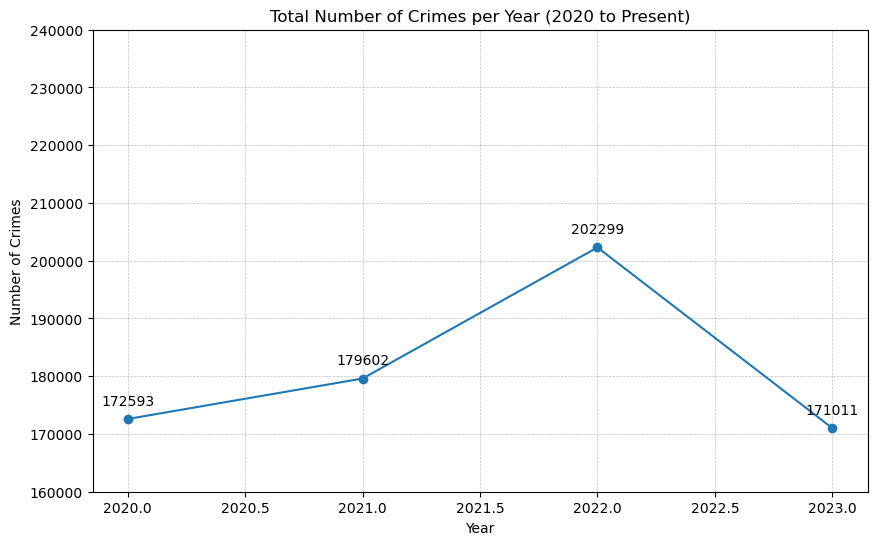

In [31]:
# Group by year and count the number of crimes in each year
crime_counts_per_year = crime_df['Year'].value_counts().sort_index()

# Plot the total number of crimes per year
plt.figure(figsize=(10, 6))
plt.plot(crime_counts_per_year.index, crime_counts_per_year.values, marker='o', linestyle='-')
plt.title('Total Number of Crimes per Year (2020 to Present)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.ylim(160000, 240000)

# Annotate each data point with the total number of crimes
for year, count in zip(crime_counts_per_year.index, crime_counts_per_year.values):
    plt.annotate(str(count), (year, count), textcoords="offset points", xytext=(0, 10), ha='center')
    
# Show the graph
plt.show()

Another graph illustrating the same information is the "Number of Crimes per Year" depicted in a bar chart, highlighting the year 2022 as the period with the highest incidence of criminal activity.

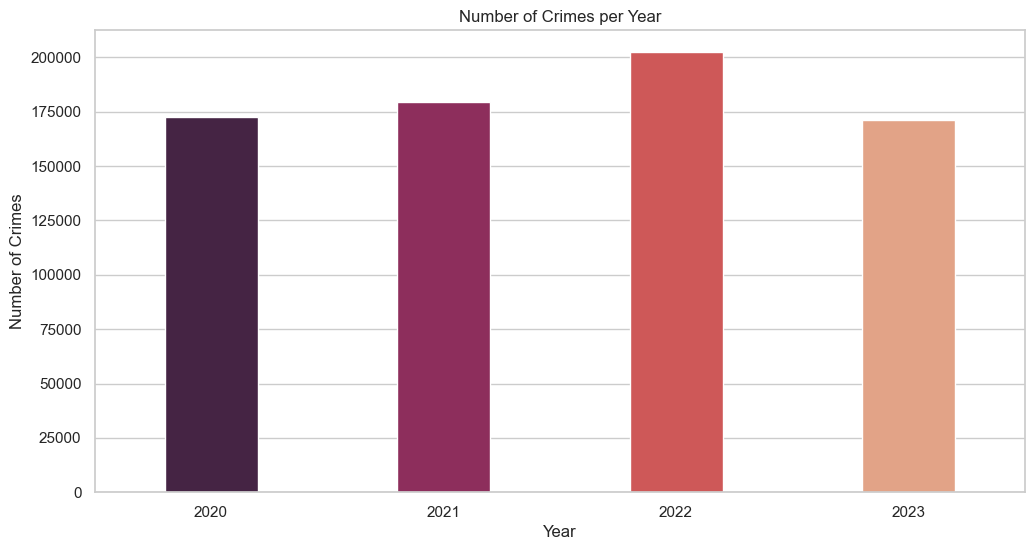

In [32]:
#Seaborn style settings
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=crime_counts_per_year.index, y=crime_counts_per_year.values, palette='rocket', saturation=0.7, ci=None, width=0.4)

# Customize the chart
plt.title('Number of Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

# Show the graph
plt.show()

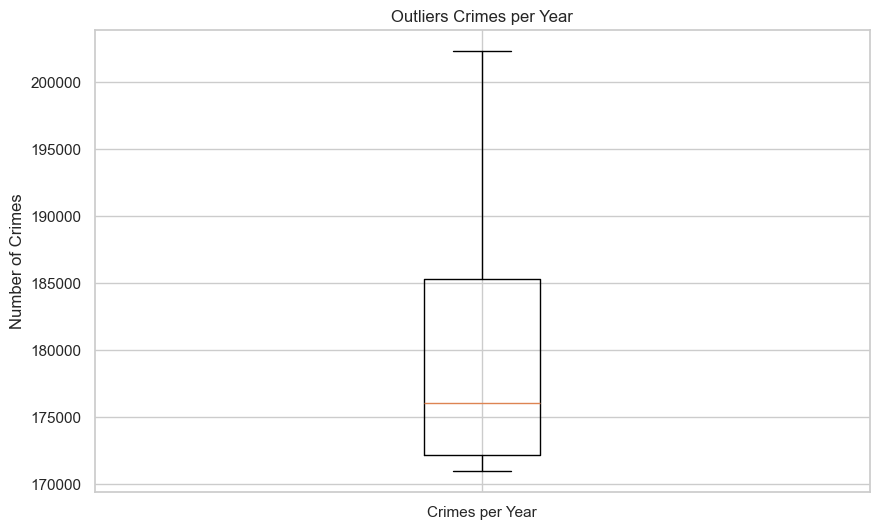

In [33]:
# Create a figure for the plot with a width of 10 inches and height of 6 inches
plt.figure(figsize=(10, 6))

# Add a title to the plot
plt.title('Outliers Crimes per Year')

# Label for the y-axis
plt.ylabel('Number of Crimes')

# Create a boxplot with the data provided in 'crime_counts_per_year'
plt.boxplot(crime_counts_per_year)

# Set ticks on the x-axis
# Here, there is a single tick at position 1 with the label 'Crimes per Year'
plt.xticks([1], ['Crimes per Year'])

# Display the plot
plt.show()

Not outliers found

#### Month

Now I will create a monthly chart to interpret the results for the year. This will make it possible to analyze patterns and variations across each month, offering a detailed view of the temporal distribution within the data.

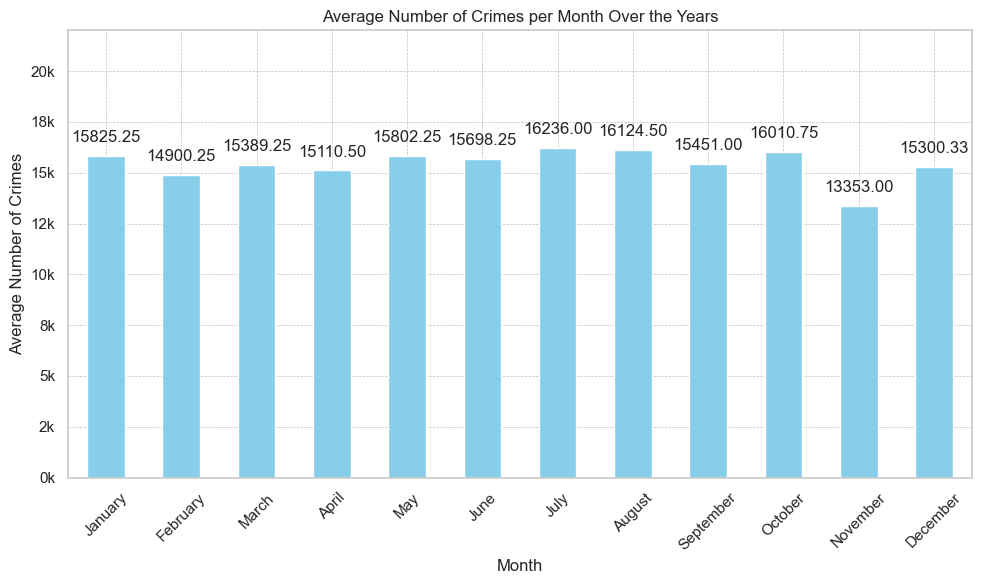

In [34]:
# Group the data by year and month and calculate the average number of crimes for each month
average_crimes_per_month = crime_df.groupby(['Year', 'Month']).size().groupby('Month').mean()

# Rename month numbers to month names
average_crimes_per_month.index = [calendar.month_name[i] for i in range(1, 13)]

# Plot the average number of crimes per month
plt.figure(figsize=(10, 6))
ax = average_crimes_per_month.plot(kind='bar', color='skyblue')
plt.title('Average Number of Crimes per Month Over the Years')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.xlabel('Month')
plt.ylabel('Average Number of Crimes')
plt.xticks(rotation=45)
plt.ylim(0, 22000)

# Format y-axis to display in thousands
def format_thousands(x, pos):
    return f'{x/1000:.0f}k'

formatter = FuncFormatter(format_thousands)
ax.yaxis.set_major_formatter(formatter)

# Annotate each bar with the average number of crimes
for i, count in enumerate(average_crimes_per_month):
    plt.annotate(f'{count:.2f}', (i, count), textcoords="offset points", xytext=(0, 10), ha='center')

# Show the graph    
plt.tight_layout()
plt.show()

As you can see, Los Angeles has experienced a lower number of crimes in November. July stands out as the month with the highest number of monthly crimes, but overall, the distribution appears well-balanced.

#### Days of week

Now I will generate a chart to interpret the results by days of the week. This graphical representation will allow me to analyze and understand variations and trends on a daily basis, highlighting any patterns or fluctuations that may emerge across different days of the week.

In [35]:
# Get the unique values of the 'DAY OF WEEK OCC' column from the crime_df DataFrame
# and stores them in the days variable to represent the days of the week.
days = crime_df['DAY OF WEEK OCC'].unique()
days

array(['Wednesday', 'Thursday', 'Saturday', 'Tuesday', 'Sunday', 'Monday',
       'Friday'], dtype=object)

In [36]:
# Calculate the number of crimes for each day of the week and store it in 'crimes_per_day_total'
crimes_per_day_total = crime_df['DAY OF WEEK OCC'].value_counts().reset_index()

# Convert the result into a DataFrame for easier manipulation
crimes_per_day_total = pd.DataFrame(crimes_per_day_total)

# Rename the columns for clarity
crimes_per_day_total.columns = ['DAY OF WEEK', 'NUMBER OF CRIMES']

# Display the resulting DataFrame containing the number of crimes for each day of the week
crimes_per_day_total

,DAY OF WEEK,NUMBER OF CRIMES
0,Friday,110159
1,Saturday,106280
2,Wednesday,102868
3,Monday,102772
4,Thursday,102139
5,Sunday,101747
6,Tuesday,99540


In [37]:
# Calculate the total number of crimes across all days by summing the 'NUMBER OF CRIMES' column
total_count_day = crimes_per_day_total['NUMBER OF CRIMES'].sum()

# Display the resulting
total_count_day

725505

In [38]:
# Convert the 'NUMBER OF CRIMES' column to integer data type (int)
crimes_per_day_total['NUMBER OF CRIMES'] = crimes_per_day_total['NUMBER OF CRIMES'].astype(int)

# Calculate the percentage of crimes for each day in relation to the total number of crimes
# and round the result to two decimal places
crimes_per_day_total['%'] = round((crimes_per_day_total['NUMBER OF CRIMES'] / total_count_day) * 100, 2)

# Display the resulting
crimes_per_day_total

,DAY OF WEEK,NUMBER OF CRIMES,%
0,Friday,110159,15.18
1,Saturday,106280,14.65
2,Wednesday,102868,14.18
3,Monday,102772,14.17
4,Thursday,102139,14.08
5,Sunday,101747,14.02
6,Tuesday,99540,13.72


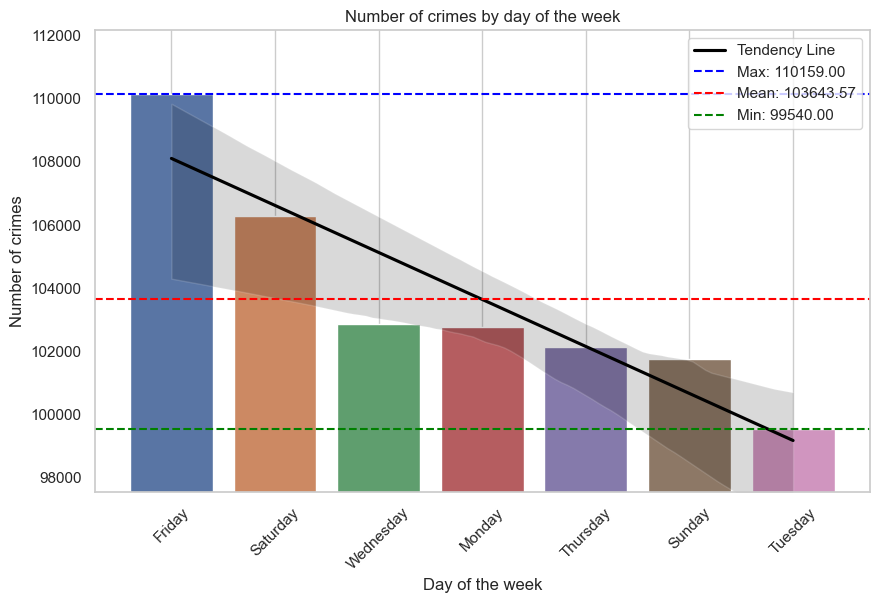

In [39]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot using seaborn
sns.barplot(x='DAY OF WEEK', y='NUMBER OF CRIMES', data=crimes_per_day_total)

# Add a regression line (tendency line) to show the overall trend
sns.regplot(x=np.arange(len(crimes_per_day_total)), y=crimes_per_day_total['NUMBER OF CRIMES'], color='black', scatter=False, label='Tendency Line')

# Calculate and add horizontal lines for maximum, mean, and minimum values
max_day = crimes_per_day_total['NUMBER OF CRIMES'].max()
plt.axhline(max_day, color='blue', linestyle='--', label=f'Max: {max_day:.2f}')

mean_day = crimes_per_day_total['NUMBER OF CRIMES'].mean()
plt.axhline(mean_day, color='red', linestyle='--', label=f'Mean: {mean_day:.2f}')

min_day = crimes_per_day_total['NUMBER OF CRIMES'].min()
plt.axhline(min_day, color='green', linestyle='--', label=f'Min: {min_day:.2f}')

# Set up the plot with grid, labels, y-axis limits, title, and legend
plt.grid()
plt.xlabel('Day of the week')
plt.ylabel('Number of crimes')
plt.ylim(crimes_per_day_total['NUMBER OF CRIMES'].min() - 2000, crimes_per_day_total['NUMBER OF CRIMES'].max() + 2000)
plt.title('Number of crimes by day of the week')
plt.legend()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

Based on the results for the number of crimes per day of the week—along with the corresponding percentages, maximum, minimum, and overall tendencies—here are some potential analyses:

- **Distribution of Crimes:**  

  The days with the highest number of crimes are Friday and Saturday, accounting for approximately 15.18% and 14.65% of the total crimes, respectively.  
  Sunday and Tuesday have the lowest number of crimes, each contributing around 13.7% to the total.

- **Weekday Comparison:**  

  The weekdays (Monday to Friday) show relatively similar numbers of crimes, with Monday, Wednesday, and Thursday having comparable counts.  
  The weekends (Saturday and Sunday) collectively have a higher number of crimes compared to weekdays.

- **Weekend Impact:**  

  Friday and Saturday together contribute nearly 29.83% of the total crimes, indicating that weekends have a significant impact on the overall crime rate.

- **Midweek Stability:**  

  Wednesday and Thursday have slightly lower crime rates compared to the beginning of the week (Monday and Tuesday), suggesting a potential midweek stability or decrease in criminal activity.


### Geospatial Distribution: (location or area(latitude and longitude))

#### Location

In [40]:
# Obtain the unique area names stored in the 'AREA NAME' column 
unique_area_names = crime_df['AREA NAME'].unique()
unique_area_names

array(['Southwest', 'Central', 'N Hollywood', 'Mission', 'Devonshire',
       'Northeast', 'Harbor', 'Van Nuys', 'West Valley', 'West LA',
       'Wilshire', 'Rampart', '77th Street', 'Hollenbeck', 'Southeast',
       'Pacific', 'Newton', 'Hollywood', 'Foothill', 'Olympic', 'Topanga'],
      dtype=object)

In [41]:
# Count the occurrences of each unique value in the 'AREA NAME' column and reset the index
crimes_per_area_total = crime_df['AREA NAME'].value_counts().reset_index()

# Convert the result into a DataFrame
crimes_per_area_total = pd.DataFrame(crimes_per_area_total)

# Rename the columns for clarity
crimes_per_area_total.columns = ['AREA NAME', 'NUMBER OF CRIMES']

# Display the first 5 rows of the resulting DataFrame
crimes_per_area_total.head(5)

,AREA NAME,NUMBER OF CRIMES
0,Central,52458
1,77th Street,44536
2,Pacific,41809
3,Southwest,40773
4,Hollywood,40596


In [42]:
# Calculate the total count of crimes by summing the 'NUMBER OF CRIMES' column in the DataFrame 'crimes_per_area_total'
total_count = crimes_per_area_total['NUMBER OF CRIMES'].sum()
total_count

725505

In [43]:
# Convert the 'NUMBER OF CRIMES' column to integers
crimes_per_area_total['NUMBER OF CRIMES'] = crimes_per_area_total['NUMBER OF CRIMES'].astype(int)

# Calculate the percentage of total crimes for each area and round to two decimal places
crimes_per_area_total['%'] = round((crimes_per_area_total['NUMBER OF CRIMES'] / total_count) * 100, 2)
crimes_per_area_total

,AREA NAME,NUMBER OF CRIMES,%
0,Central,52458,7.23
1,77th Street,44536,6.14
2,Pacific,41809,5.76
3,Southwest,40773,5.62
4,Hollywood,40596,5.60
5,Olympic,36745,5.06
6,N Hollywood,35983,4.96
7,Southeast,35981,4.96
8,Wilshire,35606,4.91
9,West LA,35059,4.83


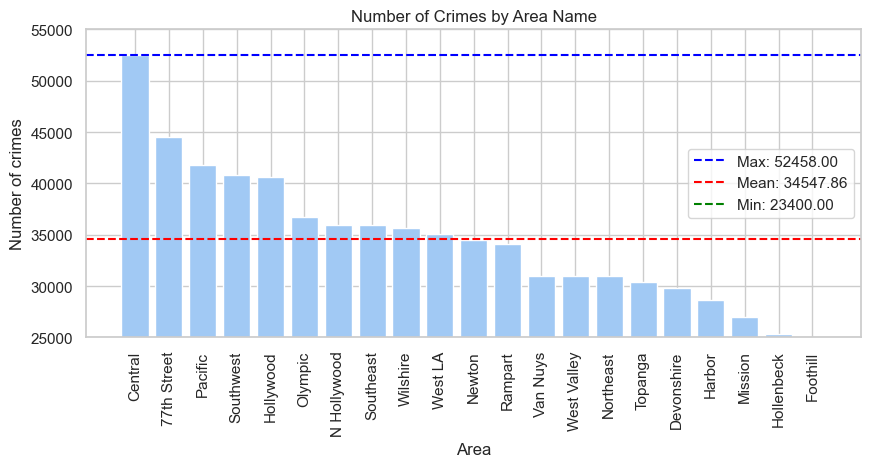

In [44]:
# Set the figure size for the bar chart
plt.figure(figsize=(10, 4))

# Set a pastel color palette for the bars
sns.set_palette("pastel")

# Create a bar chart representing the number of crimes for each area
plt.bar(crimes_per_area_total['AREA NAME'], crimes_per_area_total['NUMBER OF CRIMES'])

# Plot horizontal lines representing the maximum, mean, and minimum crime counts
max_crm = crimes_per_area_total['NUMBER OF CRIMES'].max()
plt.axhline(max_crm, color='blue', linestyle='--', label=f'Max: {max_crm:.2f}')

mean_crm = crimes_per_area_total['NUMBER OF CRIMES'].mean()
plt.axhline(mean_crm, color='red', linestyle='--', label=f'Mean: {mean_crm:.2f}')

min_crm = crimes_per_area_total['NUMBER OF CRIMES'].min()
plt.axhline(min_crm, color='green', linestyle='--', label=f'Min: {min_crm:.2f}')

# Set the title of the chart
plt.title('Number of Crimes by Area Name')

# Add a grid to the chart
plt.grid(True)

# Label the X and Y axes
plt.xlabel('Area')
plt.ylabel('Number of crimes')

# Set the Y-axis limit to focus on a specific range
plt.ylim(25000, 55000)

# Display the legend
plt.legend()

# Rotate X-axis labels for better readability
plt.xticks(rotation=90)

# Show the chart
plt.show()

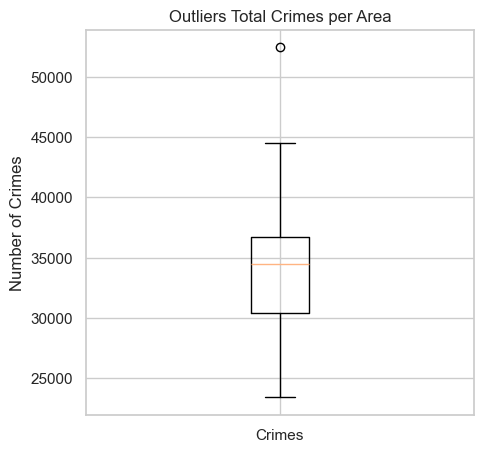

In [45]:
# Set the figure size for the boxplot
plt.figure(figsize=(5, 5))

# Set the title of the boxplot
plt.title('Outliers Total Crimes per Area')

# Set the label for the y-axis
plt.ylabel('Number of Crimes')

# Create a boxplot for the 'NUMBER OF CRIMES' column in the DataFrame 'crimes_per_area_total'
plt.boxplot(crimes_per_area_total['NUMBER OF CRIMES'])

# Set the x-axis ticks to represent the category 'Crimes'
plt.xticks([1], ['Crimes'])

# Display the boxplot
plt.show()

The number of outliers in Crimes per Area is negligible. What falls outside the norm is only the most committed crime, which exceeds 10% of the total.

In [46]:
# Calculate the adjusted standard deviation of the data in the '%' column
std_adjusted = (crimes_per_area_total['%'] / 100).std()
std_adjusted 

0.009439115676900285

From both the graph and the standard deviation, it is evident that the number of crimes is not significantly dispersed; this indicates a well-distributed pattern.

To create a heatmap displaying locations with higher crime rates, it is necessary to install additional libraries.

In [47]:
!pip install folium
!pip install folium --upgrade

In [48]:
import folium
from folium.plugins import HeatMap

In [49]:
# Create a map centered at coordinates (34.0522, -118.2437) with an initial zoom level of 10
crime_map = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# Count the number of crimes in each region
crime_counts_by_region = crime_df.groupby('AREA NAME')['DR_NO'].count()

# Initialize a list to store latitude, longitude, and crime counts data
heatmap_data = []

# Iterate over regions and their crime counts
for region_name, count in crime_counts_by_region.items():
    # Filter the DataFrame to get region-specific data
    region_df = crime_df[crime_df['AREA NAME'] == region_name]
    
    # Get the coordinates of the first instance in the region
    region_lat = region_df['LAT'].iloc[0]
    region_lon = region_df['LON'].iloc[0]
    
    # Add coordinates and crime count to the list
    heatmap_data.append([region_lat, region_lon, count])

# Create a heatmap with the collected data and add it to the main map
folium.plugins.HeatMap(heatmap_data).add_to(crime_map)

# Display the map
crime_map

### Demographic Influences: (age, sex (gender), types of crimes, types of weapons)

#### Age

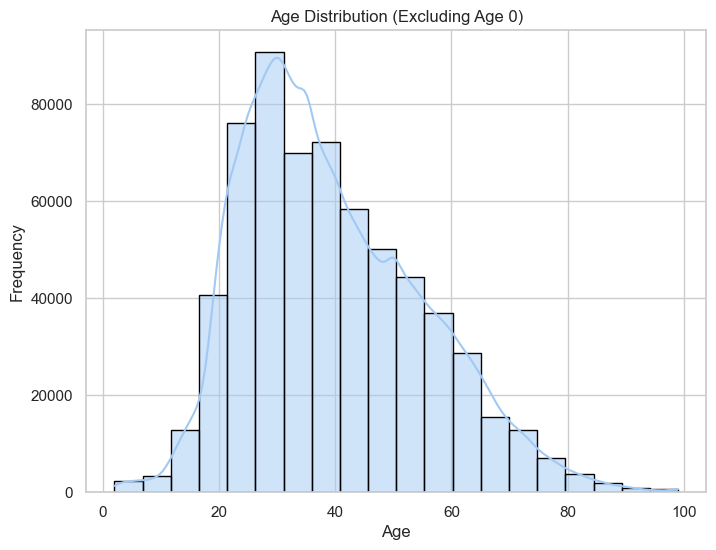

In [50]:
# Filter the DataFrame to include only rows with victim ages greater than 0
crime_df_filtered = crime_df[crime_df['Vict Age'] > 0]

# Set up the figure size
plt.figure(figsize=(8, 6))

# Create a histogram using Seaborn
sns.histplot(crime_df_filtered['Vict Age'], bins=20, kde=True, edgecolor='black')

# Set the title and axis labels
plt.title('Age Distribution (Excluding Age 0)')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [51]:
# Create a table with age ranges

# Create age ranges
bins = list(range(0, 101, 10))  # Ranges from 0 to 100 in intervals of 10

# Add a new column to the DataFrame containing the age ranges
crime_df['AgeRange'] = pd.cut(crime_df['Vict Age'], bins, right=False)

# Create a frequency table to count the number of crimes for each age range
frequency_table = crime_df['AgeRange'].value_counts().sort_index().reset_index()
frequency_table.columns = ['AgeRange', 'Crime Count']

# Display the table
print(frequency_table)

    AgeRange  Crime Count
0    [0, 10)       100082
1   [10, 20)        32280
2   [20, 30)       152493
3   [30, 40)       165923
4   [40, 50)       111157
5   [50, 60)        85330
6   [60, 70)        51195
7   [70, 80)        19904
8   [80, 90)         5670
9  [90, 100)         1401


- **Age Distribution of Victims:**  

  The majority of crime victims fall within the age range of 20 to 50, with the highest crime count occurring in the (30, 40) age range.

- **Youth Impact:**  

  There is a considerable number of victims in the age range (0, 20), indicating that crimes also affect the youth population significantly.

- **Elderly Population:** 

  The number of crimes decreases as age increases beyond 60, suggesting that older individuals are less likely to be victims of crimes.

- **Crime Prevention Target:** 
 
  Law enforcement and crime prevention efforts may need to focus on age groups with higher crime counts, such as individuals in their 20s to 40s.


#### Gender

In [52]:
# Extract unique gender values from the 'Vict Sex'
gender = crime_df['Vict Sex'].unique()
gender

array(['F', 'M', 'X'], dtype=object)

In [53]:
# Count the occurrences of each unique value in the 'Vict Sex' column and reset the index
crimes_gender = crime_df['Vict Sex'].value_counts().reset_index()

crimes_gender=pd.DataFrame(crimes_gender)

# Rename the columns for clarity
crimes_gender.columns=['Vict Sex', 'NUMBER OF CRIMES']

# Display the resulting DataFrame
crimes_gender

,Vict Sex,NUMBER OF CRIMES
0,M,344836
1,F,307406
2,X,73263


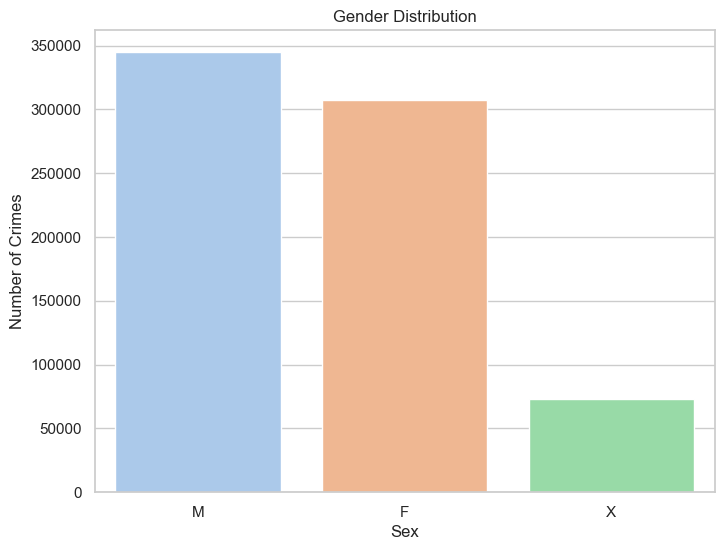

In [54]:
# Set the size of the plot figure
plt.figure(figsize=(8, 6))

# Create a countplot to visualize the distribution of 'Vict Sex'
sns.countplot(data=crime_df, x='Vict Sex', order=crime_df['Vict Sex'].value_counts().index)

# Set the title of the plot
plt.title('Gender Distribution')

# Set the label for the x-axis
plt.xlabel('Sex')

# Set the label for the y-axis
plt.ylabel('Number of Crimes')

# Display the plot
plt.show()

- **Gender Distribution:**  

  The majority of crimes appear to involve male (M) victims, with a total of 344,836 incidents recorded under this category.

- **Females as Victims:**  

  Although crimes against males are more common, there is still a significant number of crimes involving female (F) victims, totaling 307,406.

- **Other/Unknown Gender (X):**  

  A considerable number of crimes involve victims whose gender is classified as 'X'. This may represent cases where the victim's gender was not specified or where the dataset does not follow a binary gender convention.


#### Crime Types

In [55]:
unique_crime_type = crime_df['Crm Cd Desc'].unique()
unique_crime_type

array(['BATTERY - SIMPLE ASSAULT',
       'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'RAPE, FORCIBLE', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'OTHER MISCELLANEOUS CRIME',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'BURGLARY FROM VEHICLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'ARSON', 'INTIMATE PARTNER - SIMPLE ASSAULT',
       'THEFT PLAIN - PETTY ($950 & UNDER)', 'THEFT OF IDENTITY',
       'ROBBERY', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'BURGLARY', 'BRANDISH WEAPON',
       'INTIMATE PARTNER - AGGRAVATED ASSAULT', 'BUNCO, GRAND THEFT',
       'THEFT, PERSON', 'BATTERY WITH SEXUAL CONTACT', 'BIKE - STOLEN',
       'BATTERY POLICE (SIMPLE)',
       'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
       'VIOLATION OF COURT ORDER', 'TRESPASSING',
       'THEFT FROM MOTOR VEHICLE - GRAND ($950.01

In [56]:
# Count the frequency of each crime type in the 'Crm Cd Desc' column
crimes_per_type_total = crime_df['Crm Cd Desc'].value_counts().reset_index()

# Create a new DataFrame from the count results
crimes_per_type_total = pd.DataFrame(crimes_per_type_total)

# Rename the columns of the new DataFrame
crimes_per_type_total.columns=['CRIME', 'NUMBER OF CRIMES']

# Display the first 5 rows of the resulting DataFrame
crimes_per_type_total.head(5)

,CRIME,NUMBER OF CRIMES
0,BATTERY - SIMPLE ASSAULT,67162
1,BURGLARY FROM VEHICLE,51767
2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",51193
3,THEFT OF IDENTITY,51050
4,BURGLARY,50899


In [57]:
# Access the 'NUMBER OF CRIMES' column 
crime_counts_column = crimes_per_type_total['NUMBER OF CRIMES']

# Calculate the sum of all values in the 'NUMBER OF CRIMES' column
total_count_tp = crime_counts_column.sum()

# Display the total count of crimes
total_count_tp

725505

In [58]:
# Convert the 'NUMBER OF CRIMES' column in the DataFrame 'crime_df' to integer type
crimes_per_type_total['NUMBER OF CRIMES'] = crimes_per_type_total['NUMBER OF CRIMES'].astype(int)

# Calculate the percentage of each crime type relative to the total count
crimes_per_type_total['%']=round((crimes_per_type_total['NUMBER OF CRIMES']/total_count_tp)*100,2)

# Display the first 5 rows of the modified DataFrame
crimes_per_type_total.head(5)

,CRIME,NUMBER OF CRIMES,%
0,BATTERY - SIMPLE ASSAULT,67162,9.26
1,BURGLARY FROM VEHICLE,51767,7.14
2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",51193,7.06
3,THEFT OF IDENTITY,51050,7.04
4,BURGLARY,50899,7.02


We chose to graphically represent the 20 most common crimes since they account for over 80% of the crimes committed

In [59]:
crimes_per_type_total.head(20)

,CRIME,NUMBER OF CRIMES,%
0,BATTERY - SIMPLE ASSAULT,67162,9.26
1,BURGLARY FROM VEHICLE,51767,7.14
2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",51193,7.06
3,THEFT OF IDENTITY,51050,7.04
4,BURGLARY,50899,7.02
5,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",48376,6.67
6,THEFT PLAIN - PETTY ($950 & UNDER),42648,5.88
7,INTIMATE PARTNER - SIMPLE ASSAULT,42321,5.83
8,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,30336,4.18
9,ROBBERY,28777,3.97


Most Common: BATTERY - SIMPLE ASSAULT with: 67162 occurrences


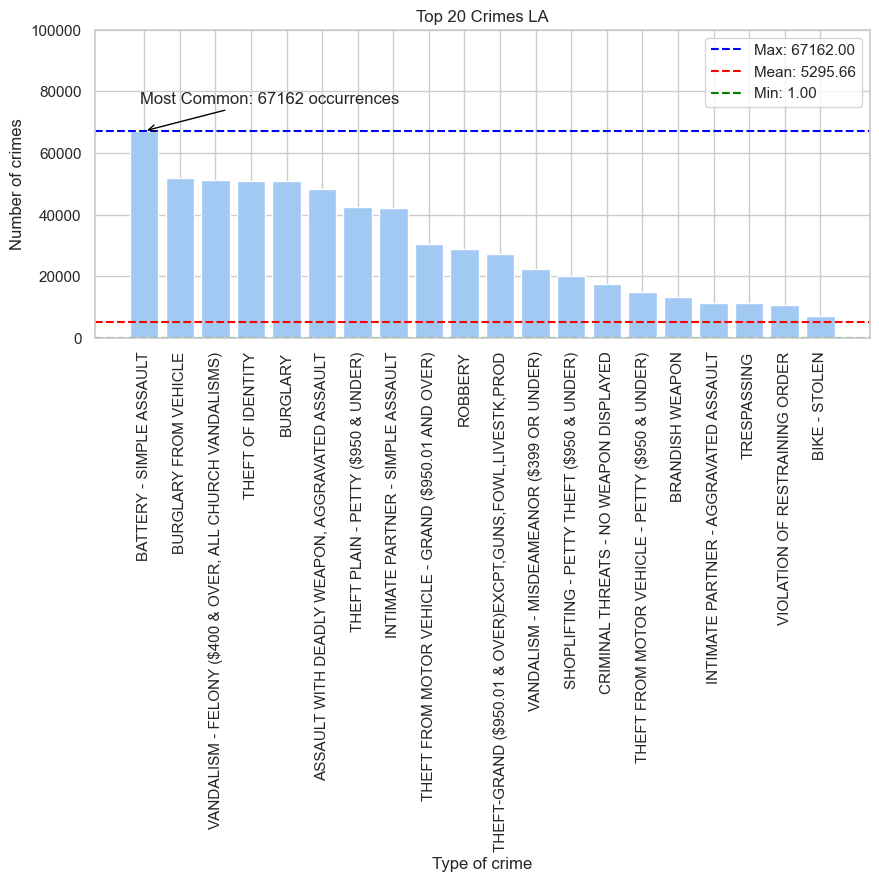

In [60]:
# Set the size of the chart figure
plt.figure(figsize=(10, 4))

# Select the top 20 most common crimes from the DataFrame
top_20_crimes = crimes_per_type_total.head(20)

# Set the color palette for the bar chart
sns.set_palette("pastel")

# Create a bar chart with crime types on the X-axis and counts on the Y-axis
plt.bar(top_20_crimes['CRIME'], top_20_crimes['NUMBER OF CRIMES'])

# Add a title to the chart
plt.title('Top 20 Crimes LA')

# Rotate X-axis labels for better readability
plt.xticks(rotation=90)

# Add dashed lines to represent the maximum, mean, and minimum crime frequency
max_crm_total = crimes_per_type_total['NUMBER OF CRIMES'].max()
plt.axhline(max_crm_total, color='blue', linestyle='--', label=f'Max: {max_crm_total:.2f}')

mean_crm_total = crimes_per_type_total['NUMBER OF CRIMES'].mean()
plt.axhline(mean_crm_total, color='red', linestyle='--', label=f'Mean: {mean_crm_total:.2f}')

min_crm_total = crimes_per_type_total['NUMBER OF CRIMES'].min()
plt.axhline(min_crm_total, color='green', linestyle='--', label=f'Min: {min_crm_total:.2f}')

# Print information about the most common crime to the console
print(f'Most Common: {top_20_crimes.iloc[0]["CRIME"]} with: {top_20_crimes.iloc[0]["NUMBER OF CRIMES"]} occurrences')

# Add an additional label for the most common crime on the chart
plt.annotate(f"Most Common: {top_20_crimes.iloc[0]['NUMBER OF CRIMES']} occurrences", 
             (top_20_crimes.iloc[0]["CRIME"], top_20_crimes.iloc[0]["NUMBER OF CRIMES"]),
             textcoords="offset points", xytext=(90, 20), ha='center',
             arrowprops=dict(arrowstyle="->", color='black'))

# Add a grid to the chart
plt.grid(True)

# Labels for the X and Y axes
plt.xlabel('Type of crime')
plt.ylabel('Number of crimes')

# Set the Y-axis range
plt.ylim(0, 100000)

# Show the legend of the chart
plt.legend()

# Display the chart
plt.show()

To confirm the most common crime, I created a pie chart featuring the top 10 offenses.

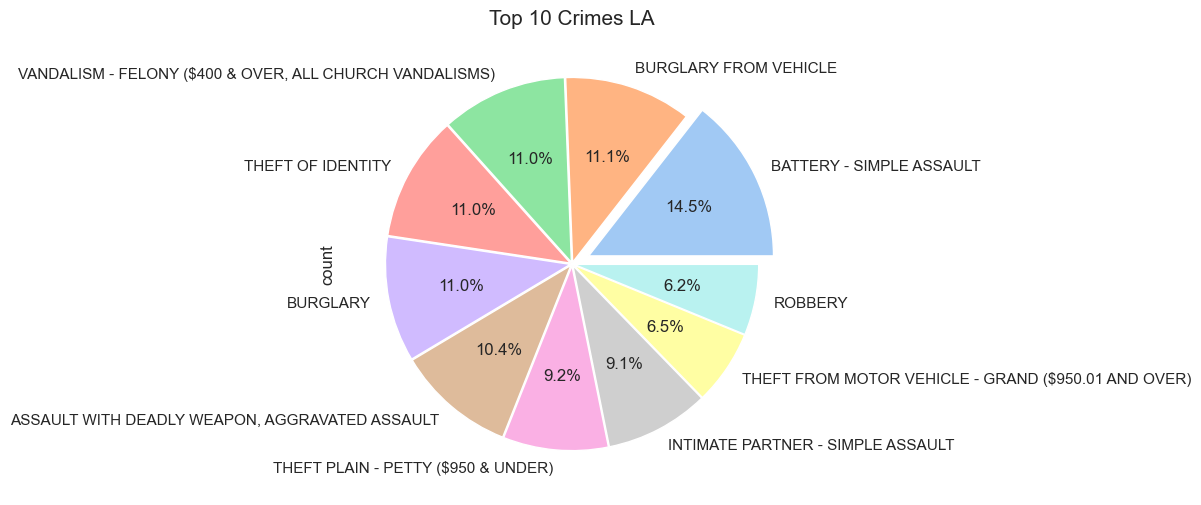

In [61]:
# Plotting a pie chart for the top 10 most common crimes with a different color palette
crime_df["Crm Cd Desc"].value_counts()[:10].plot.pie(figsize=(9, 6), explode=(0.1, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01), autopct="%1.1f%%")

# Add a title to the chart
plt.title('Top 10 Crimes LA',fontsize=15)

# Display the pie chart
plt.show()

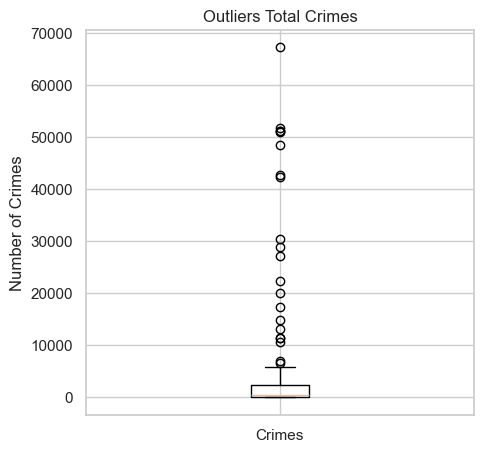

In [62]:
# Set the figure size to 5x5 inches
plt.figure(figsize=(5, 5))

# Set the title of the plot
plt.title('Outliers Total Crimes')

# Set the label for the y-axis
plt.ylabel('Number of Crimes')

# Create a boxplot for the 'NUMBER OF CRIMES' column in the DataFrame 'crimes_per_type_total'
plt.boxplot(crimes_per_type_total['NUMBER OF CRIMES'])

# Set the x-axis ticks to represent the category 'Crimes'
plt.xticks([1], ['Crimes'])

# Display the plot
plt.show()

These outliers stem from the occurrence of multiple crimes committed only once. Consequently, the graph portrays the most common crimes as outliers. However, it's important to note that this isn't indicative of an emergency; rather, it reflects the inherent distribution of crimes, and my focus remains on those of greater significance.

#### Types of weapons

In [63]:
# Count the frequency of each weapons type in the 'Weapon Desc' column
weapons_per_type_total = crime_df['Weapon Desc'].value_counts().reset_index()

# Create a new DataFrame from the count results
weapons_per_type_total = pd.DataFrame(weapons_per_type_total)

# Rename the columns of the new DataFrame
weapons_per_type_total.columns=['WEAPONS', 'NUMBER OF CRIMES']

# Display the first 5 rows of the resulting DataFrame
weapons_per_type_total.head(6)

,WEAPONS,NUMBER OF CRIMES
0,NaN,432546
1,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",157090
2,UNKNOWN WEAPON/OTHER WEAPON,31224
3,VERBAL THREAT,21437
4,HAND GUN,18093
5,SEMI-AUTOMATIC PISTOL,6564


- **NaN (Not Specified):** 

  There is a significant number of crimes (432,546) where the type of weapon was not specified or recorded. The lack of specificity in these cases may pose challenges in understanding the details of the incidents.

- **STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE):**  

  This category accounts for a substantial number of crimes (157,090).  
  The prevalence of strong-arm crimes suggests that direct physical force—such as punches, kicks, or bodily contact—is a significant factor in a large portion of incidents.

- **UNKNOWN WEAPON/OTHER WEAPON:**  

  There are 31,224 crimes where an unknown weapon or another type of weapon was not clearly specified.  
  Further analysis may be needed to understand the nature of these incidents and the types of weapons involved.

- **VERBAL THREAT:**  

  There are 21,437 crimes involving verbal threats without the use of physical weapons.  
  These incidents reflect verbal intimidation and may vary in severity.

- **HAND GUN:**  

  Handguns are associated with 18,093 crimes.  
  Their presence in a significant number of cases underscores the role of firearms in criminal activity.

- **SEMI-AUTOMATIC PISTOL:**  

  Crimes involving semi-automatic pistols total 6,564 incidents.  
  This adds specificity to the understanding of firearm types used in a subset of cases.


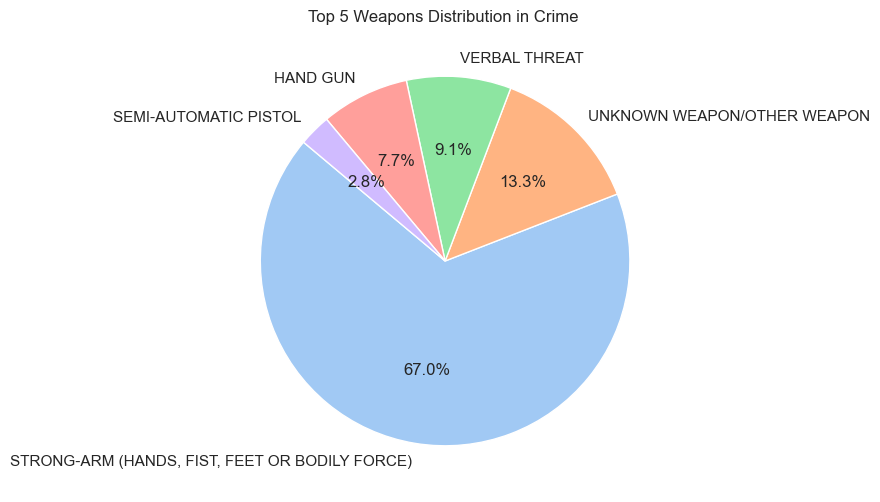

In [64]:
# Filter the DataFrame to exclude rows where the 'Weapon Desc' column is 'NaN'
filtered_df = crime_df[crime_df['Weapon Desc'] != 'NaN']

# Set the size of the pie chart figure
plt.figure(figsize=(10, 6))

# Create a pie chart with the top five most common weapons
plt.pie(filtered_df['Weapon Desc'].value_counts().nlargest(5), 
        labels=filtered_df['Weapon Desc'].value_counts().nlargest(5).index, 
        autopct='%1.1f%%', startangle=140)

# Set the title of the chart
plt.title('Top 5 Weapons Distribution in Crime ')

# Show the chart
plt.show()

- Physical force (strong-arm) and the use of handguns are prominent factors in a large number of reported crimes.
- Verbal threats, while lower in number compared to other categories, still represent a significant aspect of incidents.

## Conclusion

In conclusion, my comprehensive analysis of crime in Los Angeles—guided by the proposed hypotheses and supported by the data—yields several key insights. The year 2022 stood out as a peak period, highlighting temporal fluctuations, while Fridays and Saturdays emerged as the days with the highest crime rates. 

The age distribution revealed a concentration of victims between 20 and 50 years old, with male victims outnumbering other gender categories. The analysis of weapons involved emphasized the significance of physical force and firearms, with verbal threats also playing a notable role.

Together, these findings provide a clearer understanding of how crime manifests across time, demographics, and context in an urban environment like Los Angeles.
